In [1]:
import os
from sys import platform

import numpy as np
import matplotlib.pyplot as plt
from geant3_parser import Geant3DataFile
from geant3_parser import build_train_set_xy


In [2]:


file_name = os.path.join('data', 'shower_geant3_new.dat')


# file_name = 'sample_data.txt'
data_file = Geant3DataFile(file_name, skip_lines=3)

cells, true_values = build_train_set_xy(data_file, 5000, normalize=True)

arr=np.array([[]])
for i in range(4999,2):
    cells[i]=np.reshape(cells[i],1,-1)
    cells[i+1]=np.reshape(cells[i+1],1,-1)
    arr=np.hstack(cells[i],cells[i+1])

print(cells.shape)

Time open 2.538043975830078
Time split 1.2305052280426025
(5000, 121)


In [3]:
from tensorflow.keras.models import load_model
import seaborn as sn

2022-06-21 18:36:11.567784: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [5]:
model = load_model('trained_models/reshape(5000, 121)_autoencoder.hd5')

# Run ML on data
eval_e = model.predict(cells)

In [6]:
eval_e.shape

(5000, 121)

In [7]:
cells.shape

(5000, 121)

In [8]:
cells[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.06301338,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06301338, 0.        , 0.        , 0.12602676,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.16288722, 0.29619059, 0.26276107,
       0.32057823, 0.19974769, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.18904014, 0.16288722, 0.32826526,
       0.6722825 , 0.45305515, 0.19974769, 0.14631254, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.14631254,
       0.32826526, 0.45671641, 0.36093563, 0.12602676, 0.     

In [9]:
eval_e[0]

array([-0.07247677, -0.10465765, -0.06392991, -0.04127807, -0.0928154 ,
       -0.09815436, -0.0877203 , -0.04779879, -0.07749885, -0.09582173,
       -0.12119462, -0.0774859 , -0.08277956, -0.04888784, -0.06426273,
       -0.11175784, -0.07234381, -0.05998122, -0.05797905, -0.07421027,
       -0.09597298, -0.05910863, -0.0694632 , -0.07573734,  0.01258342,
        0.03112008,  0.0522871 ,  0.06352729,  0.05323146,  0.02495499,
        0.00885108, -0.04496549, -0.01474416, -0.07715061, -0.03994436,
       -0.10136631, -0.04614675,  0.14212358, -0.13167967,  0.15338573,
        0.07798979,  0.03042616, -0.10518628, -0.08411232, -0.0722857 ,
       -0.05456646,  0.04957032,  0.14570896,  0.29851982, -0.05745368,
        0.29799068,  0.14711113,  0.04617224, -0.04402366, -0.06211164,
       -0.03981598, -0.04845305,  0.06211562,  0.18135487,  0.40539354,
        0.6670949 ,  0.40811294,  0.178889  ,  0.05753898, -0.0541206 ,
       -0.03942744, -0.04782146, -0.10808319, -0.13855611, -0.08

In [10]:
eval_e[eval_e<0]=0

In [11]:
eval_e[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01258342,
       0.03112008, 0.0522871 , 0.06352729, 0.05323146, 0.02495499,
       0.00885108, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.14212358, 0.        , 0.15338573,
       0.07798979, 0.03042616, 0.        , 0.        , 0.        ,
       0.        , 0.04957032, 0.14570896, 0.29851982, 0.        ,
       0.29799068, 0.14711113, 0.04617224, 0.        , 0.        ,
       0.        , 0.        , 0.06211562, 0.18135487, 0.40539354,
       0.6670949 , 0.40811294, 0.178889  , 0.05753898, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.31027803, 0.        , 0.3032803 , 0.        , 0.05643

After eval_e[eval_e<0]=0

In [12]:
#for i th events i=event_number
#if you want to see the event, change i to the event number you want to see
""" plt.plot(cells[i],label='true',color='red')
plt.plot(eval_e[i],label='pred',color='blue')
plt.legend()
plt.title('reshape(5000, 121)_autoencoder event {}'.format(i)) """

for i in range(9): # event_number
    plt.plot(cells[i],label='true',color='red')
    plt.plot(eval_e[i],label='pred',color='blue')
    plt.legend()
    plt.title('reshape(5000, 121)_autoencoder event {}'.format(i))
    plt.savefig('result_plots/reshape(5000, 121)_autoencoder_true_pred_comp/reshape(5000, 121)_autoencoder_event_{}.png'.format(i))
    plt.close()

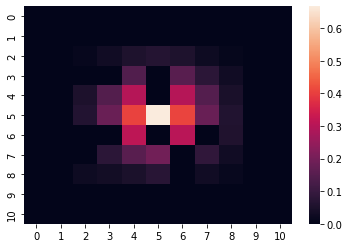

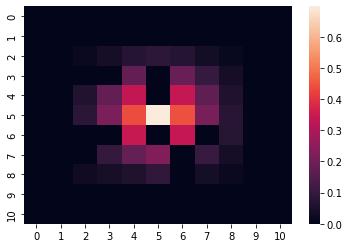

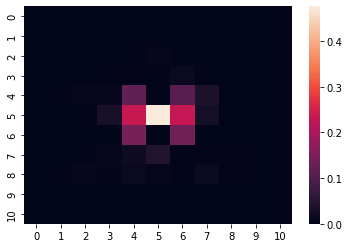

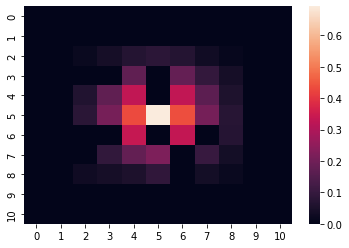

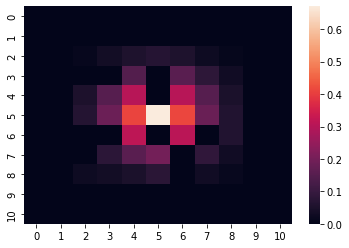

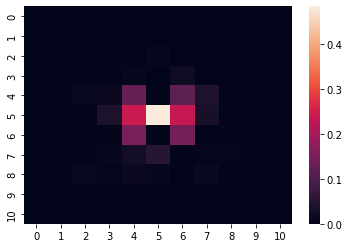

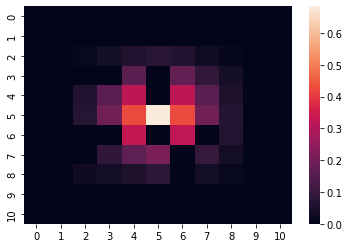

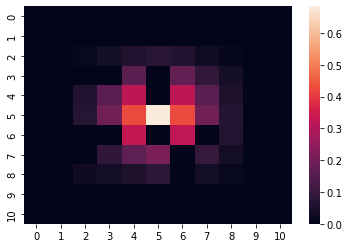

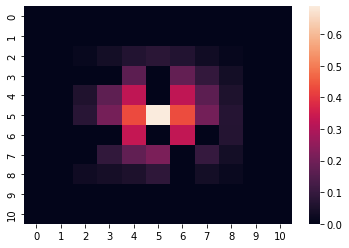

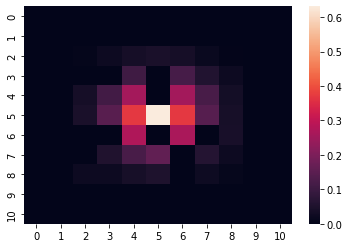

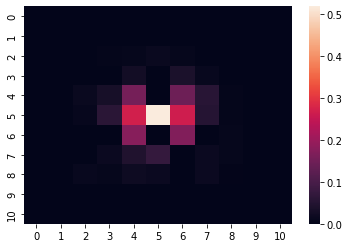

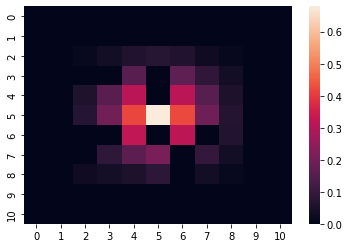

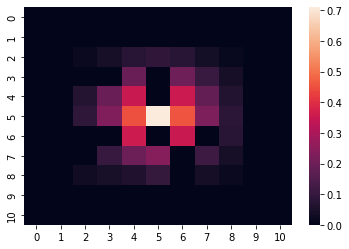

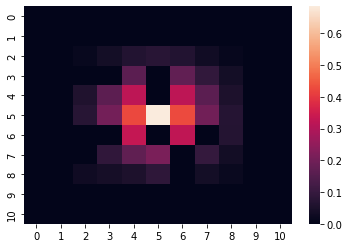

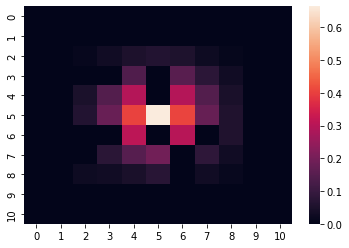

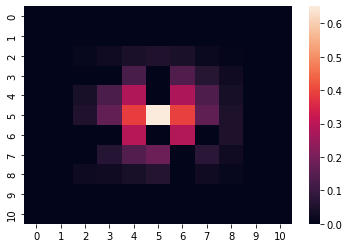

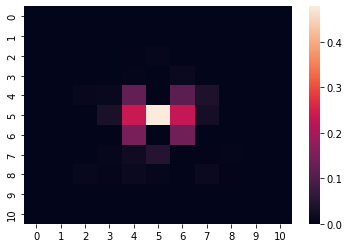

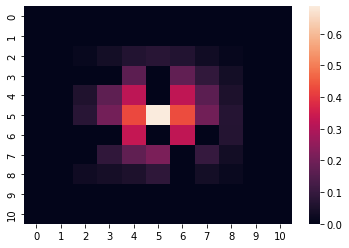

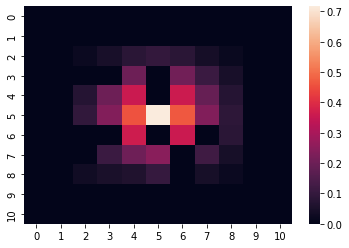

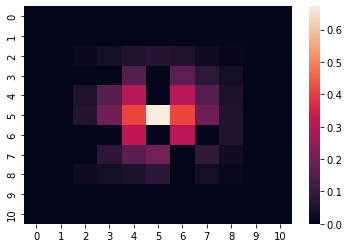

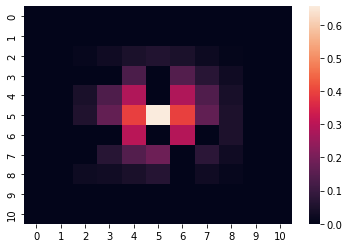

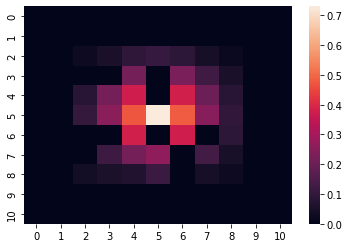

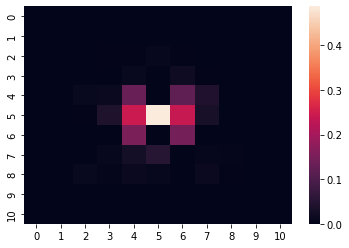

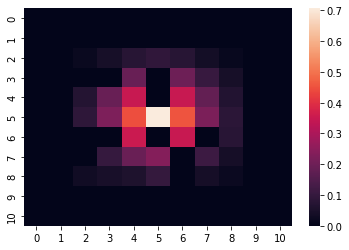

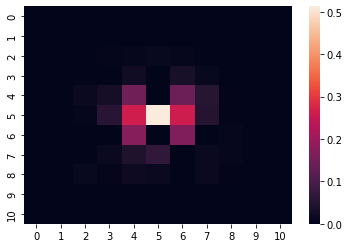

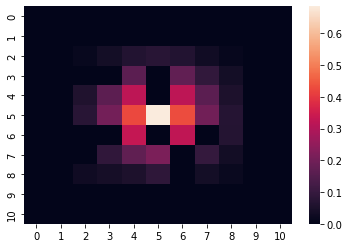

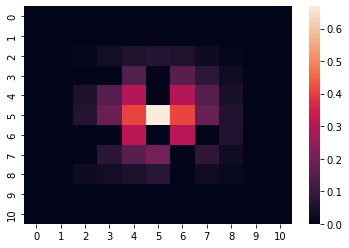

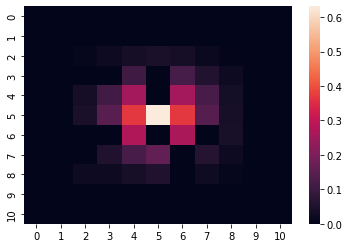

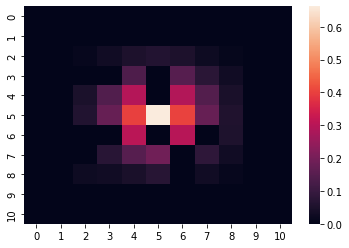

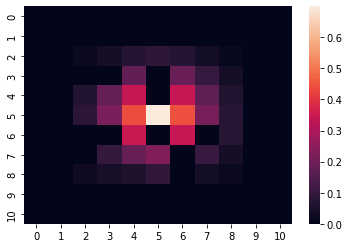

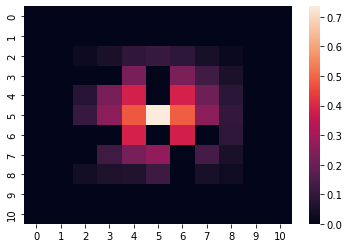

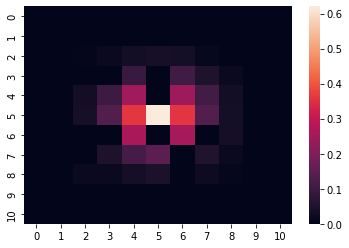

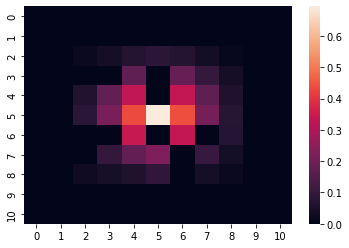

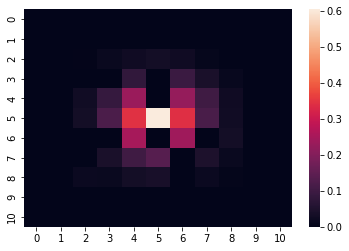

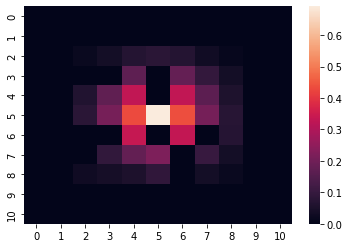

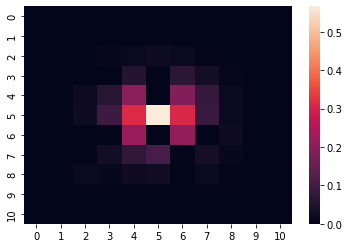

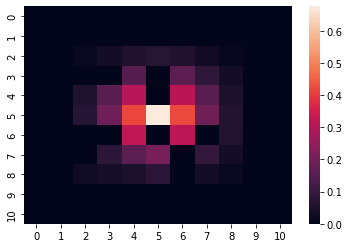

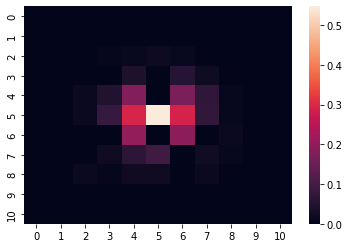

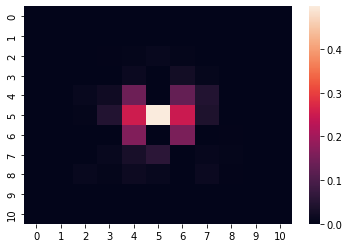

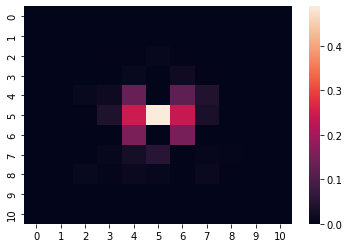

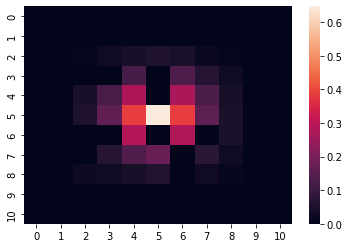

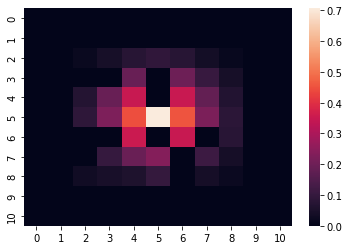

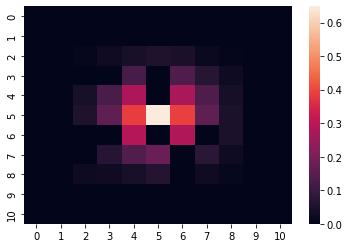

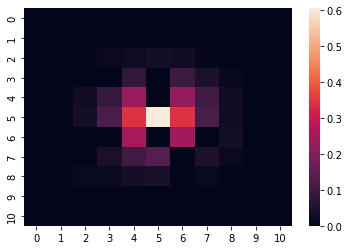

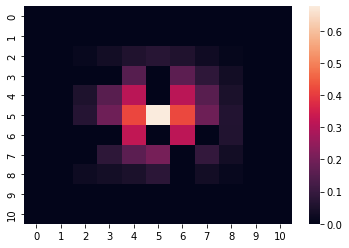

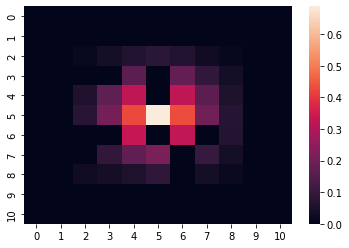

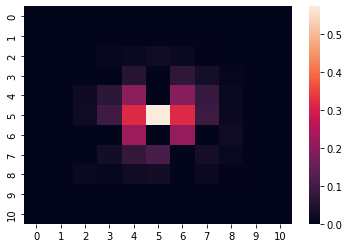

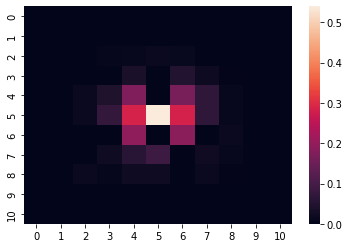

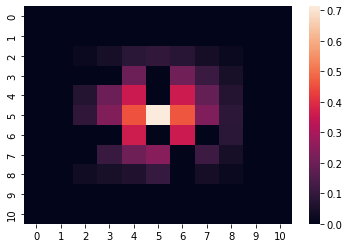

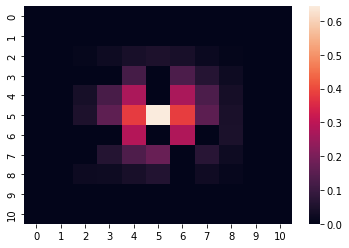

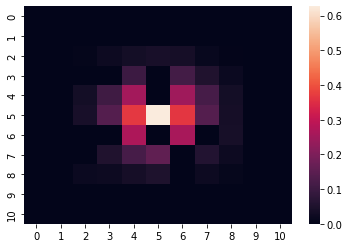

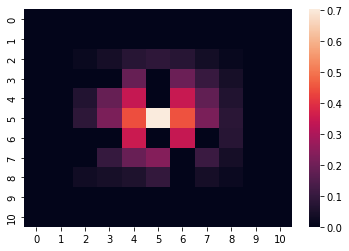

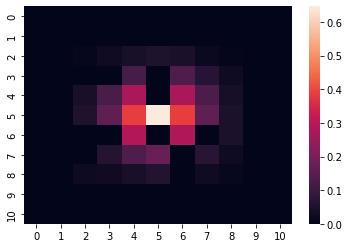

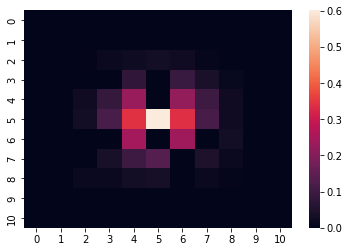

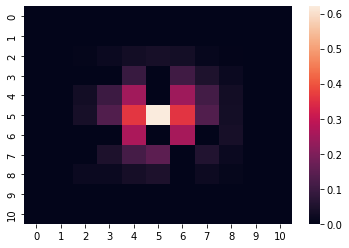

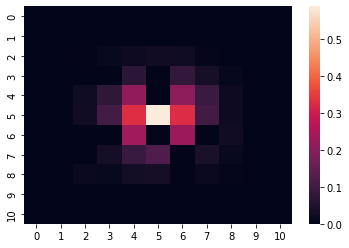

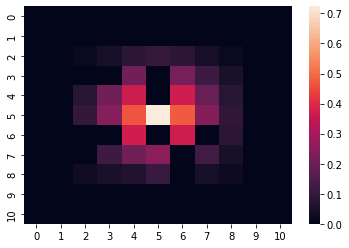

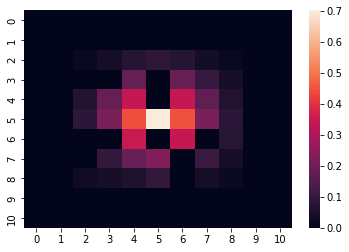

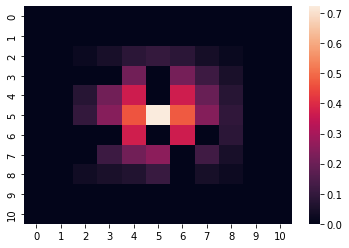

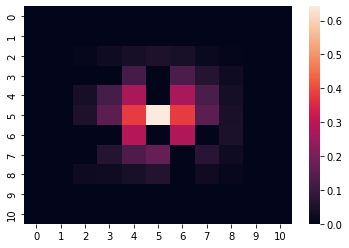

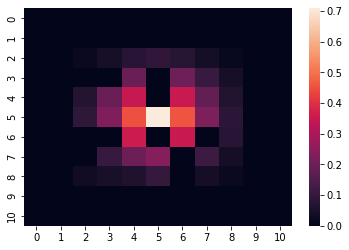

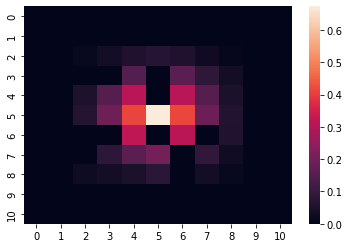

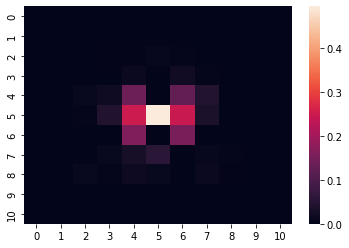

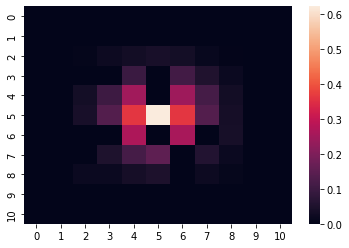

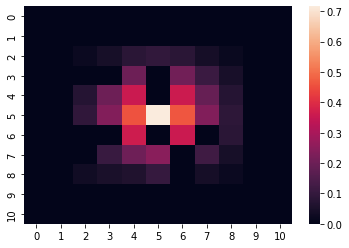

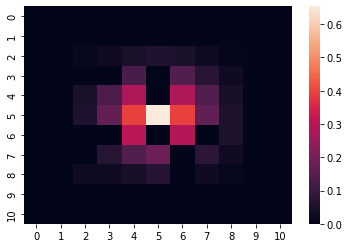

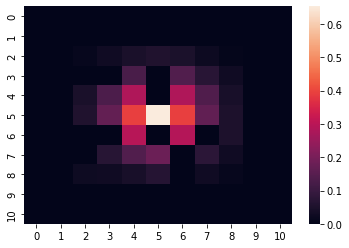

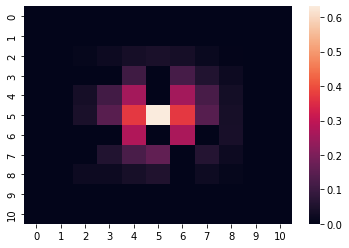

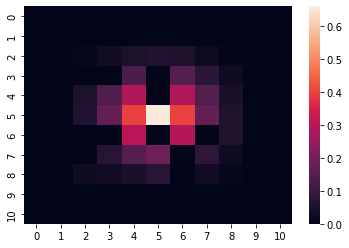

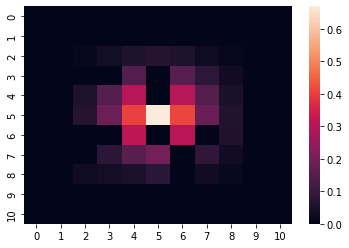

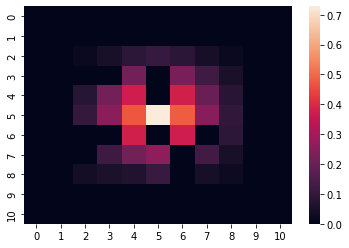

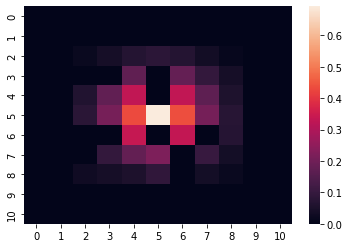

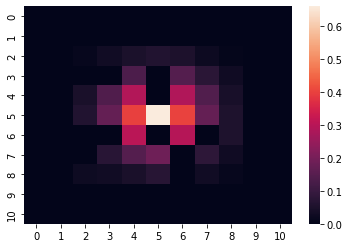

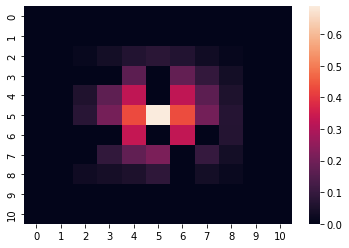

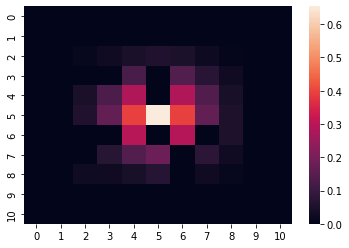

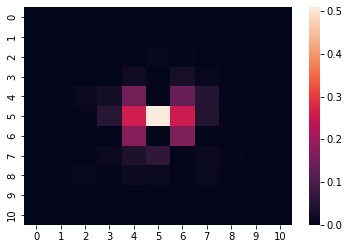

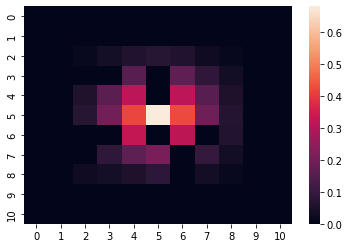

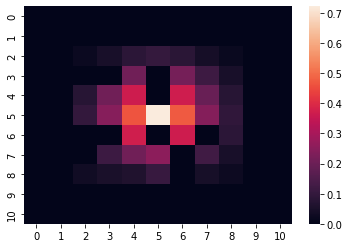

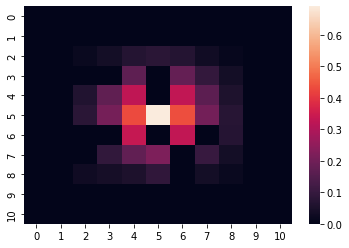

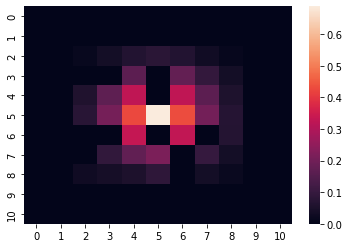

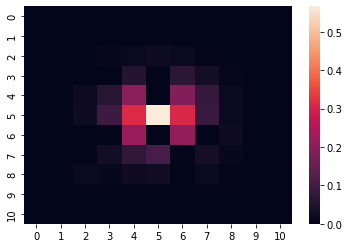

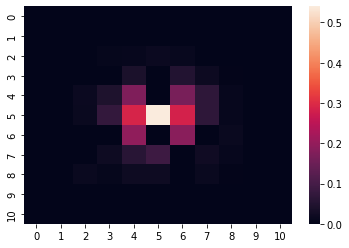

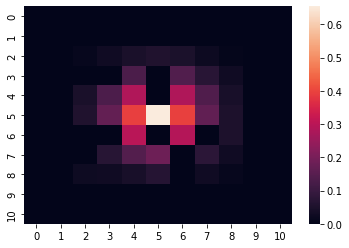

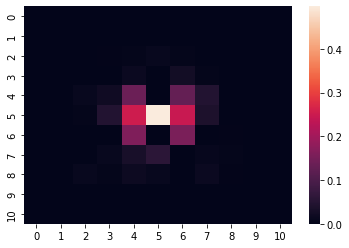

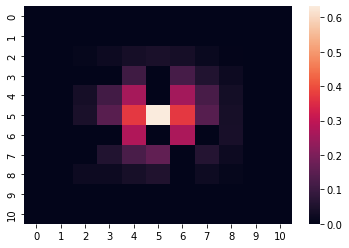

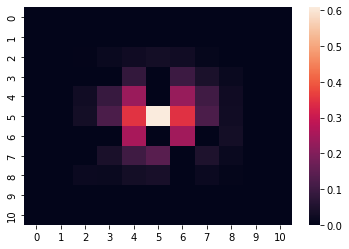

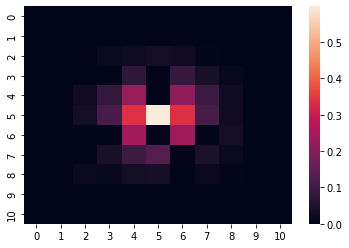

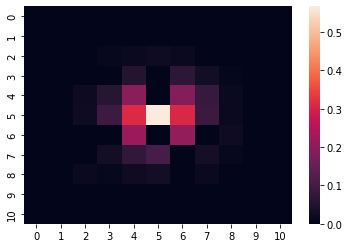

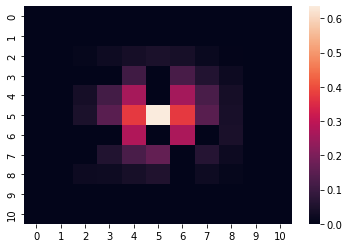

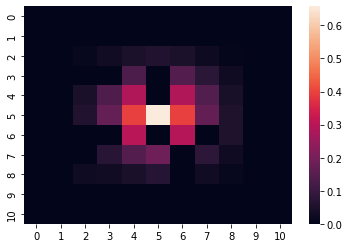

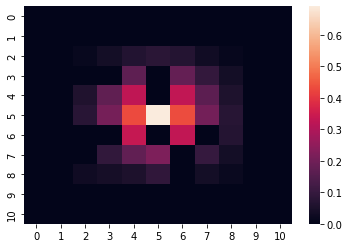

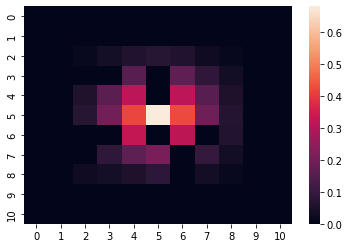

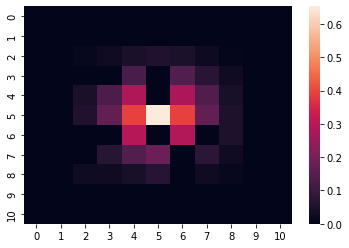

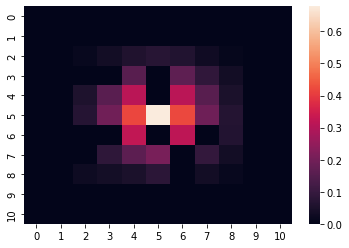

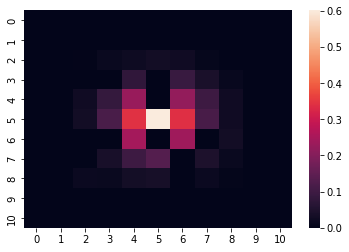

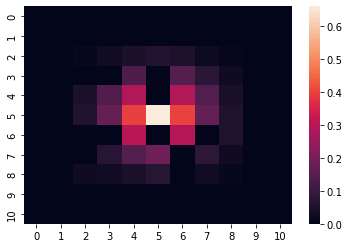

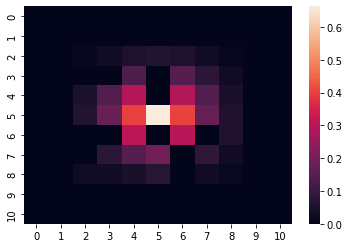

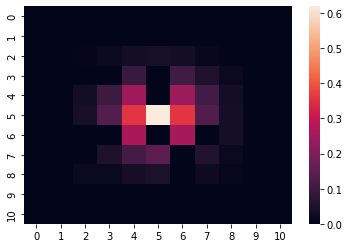

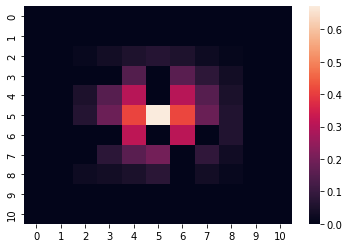

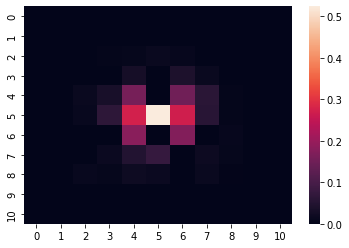

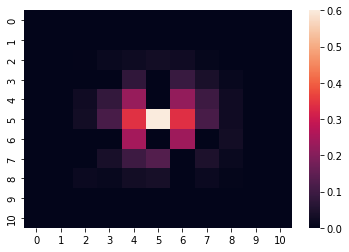

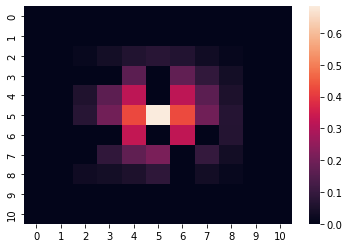

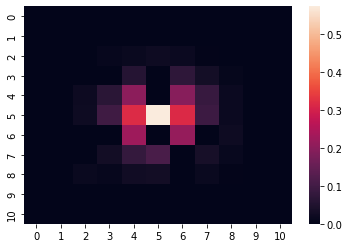

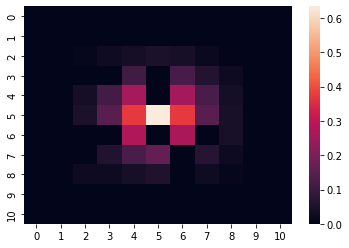

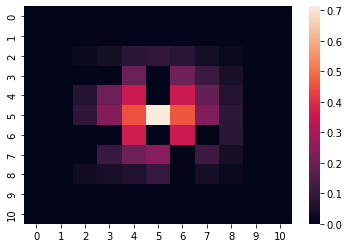

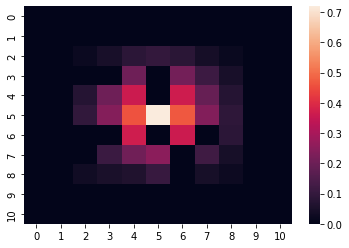

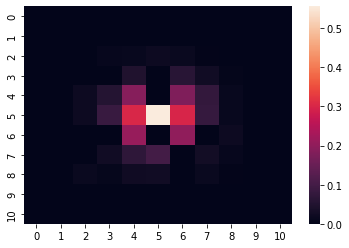

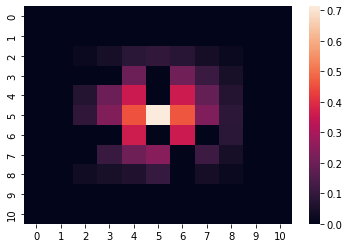

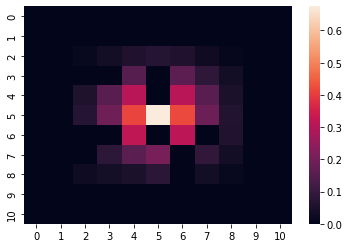

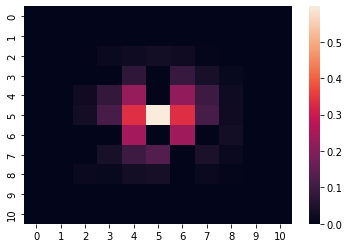

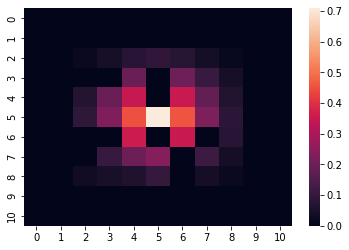

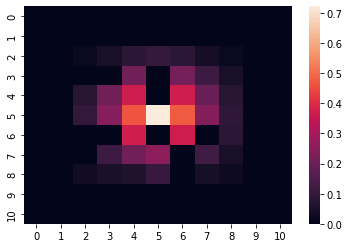

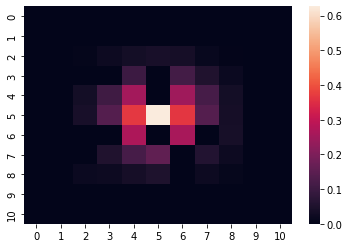

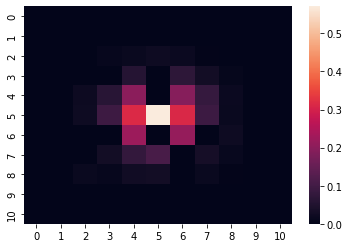

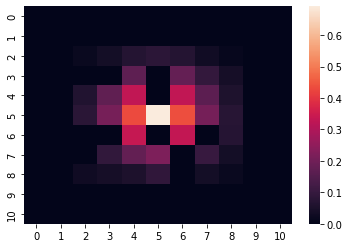

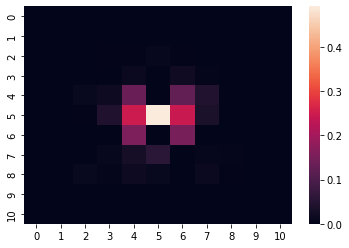

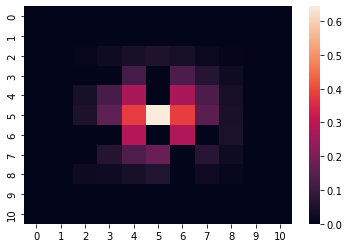

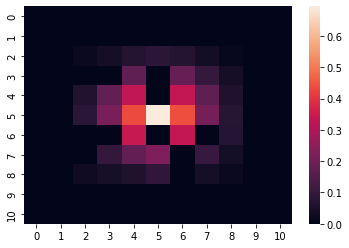

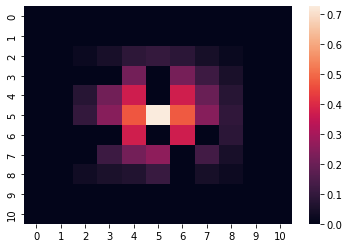

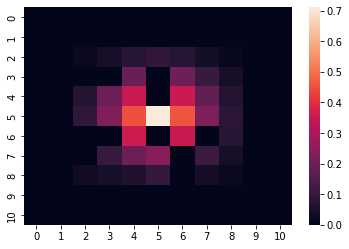

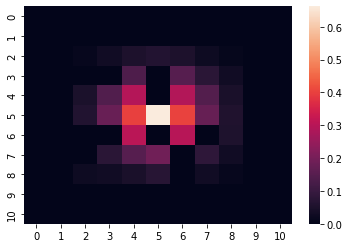

In [13]:
for i in range(121): #events number
  arr = np.array(eval_e[i])
  arr = np.reshape( arr, (11, 11))
  sn.heatmap(data = arr)
  name = "result_" + str(i) + ".png"
  plt.savefig(os.path.join("result_plots/reshape(5000, 121)_autoencoder_gen", name))
  plt.show()